# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/bank_transactions_data_2.csv')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df.head()

TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70             Doctor                   81              1   
1           68             Doctor                  141              1   
2           19            Student                   56              1   
3           26            Student                   25              1   
4           26            Student                  198              1   

   AccountBalance PreviousTransactionDate  
0         5112.21     2024-11-04 08:08:08  
1        13758.91     2024-11-04 08:09:35  
2         1122.35     2024-11-04 08:07:04  
3         8569.06     2024-11-04 08:09:06  
4         7429.40     2024-11-04 08:06:39

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

# 1. Memahami Sruktur Data

In [5]:
print("\nJumlah Baris dan Kolom:", df.shape)


Jumlah Baris dan Kolom: (2512, 16)


In [6]:
print("\nInformasi Data:")
df.info()


Informasi Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  Account

# 2. Menangani Data yang Hilang

In [7]:
print("\nJumlah Data yang Hilang:")
print(df.isnull().sum())


Jumlah Data yang Hilang:
TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


In [8]:
print("\nJumlah Duplikat Data:")
print(df.duplicated().sum())


Jumlah Duplikat Data:
0


# 3. Analisis Distribusi dan Korelasi

In [9]:
df.describe()

TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count        2512.000000  2512.000000          2512.000000    2512.000000   
mean          297.593778    44.673965           119.643312       1.124602   
std           291.946243    17.792198            69.963757       0.602662   
min             0.260000    18.000000            10.000000       1.000000   
25%            81.885000    27.000000            63.000000       1.000000   
50%           211.140000    45.000000           112.500000       1.000000   
75%           414.527500    59.000000           161.000000       1.000000   
max          1919.110000    80.000000           300.000000       5.000000   

       AccountBalance  
count     2512.000000  
mean      5114.302966  
std       3900.942499  
min        101.250000  
25%       1504.370000  
50%       4735.510000  
75%       7678.820000  
max      14977.990000

In [11]:
df.drop(columns=['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID', 'PreviousTransactionDate'], inplace=True)

In [12]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
print("\nKolom Numerik:", numerical_cols)


Kolom Numerik: ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']


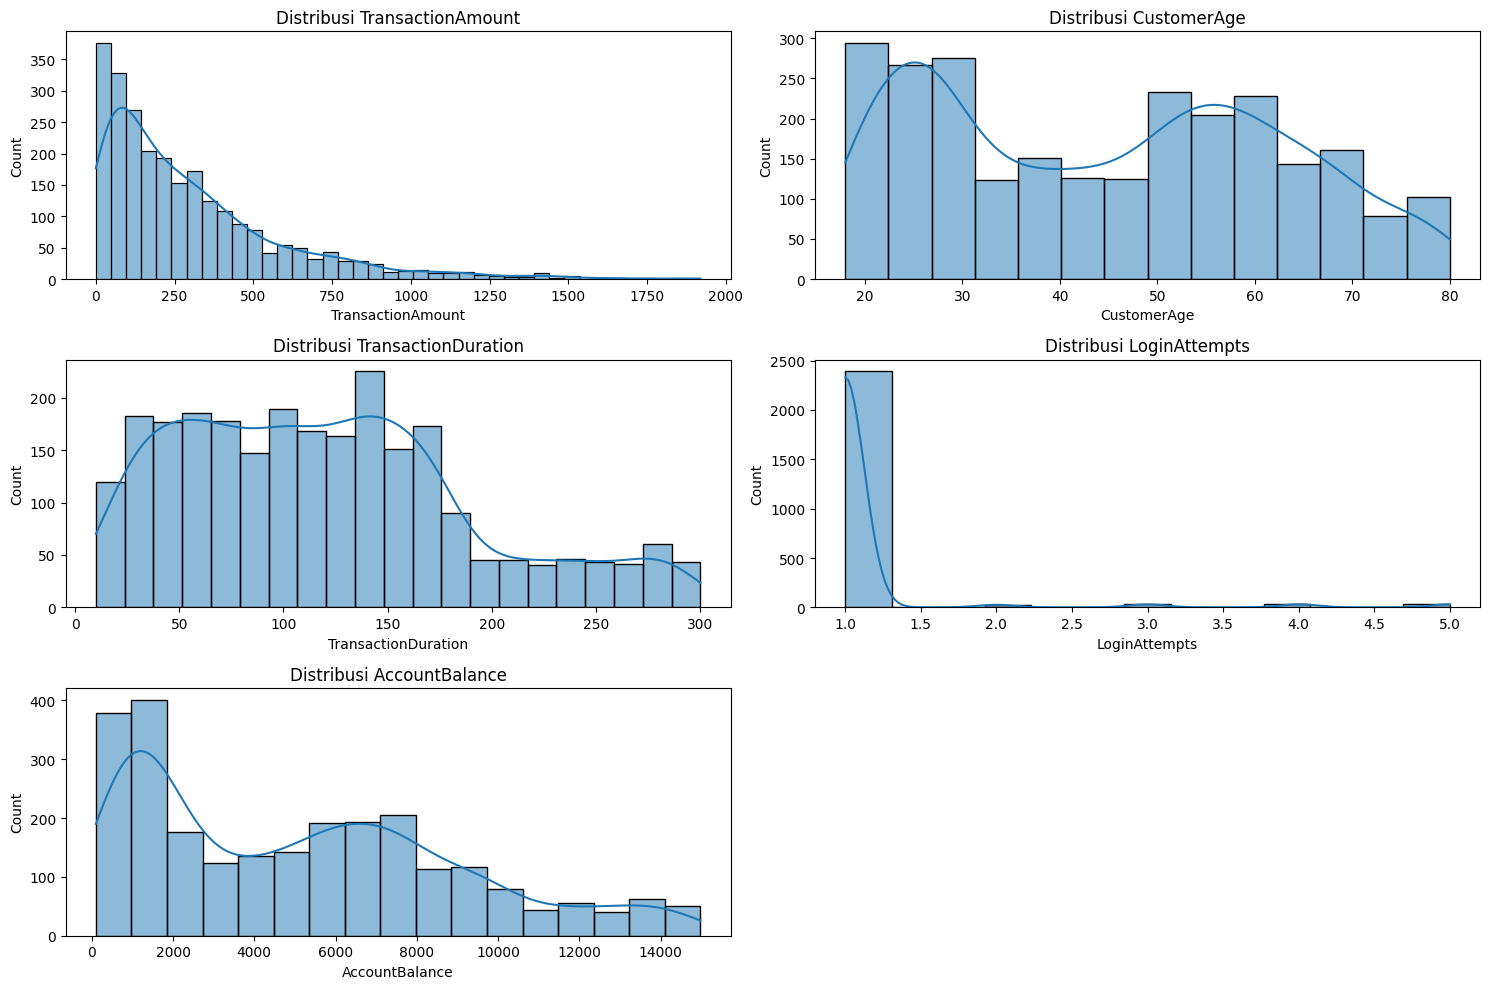

In [13]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
  plt.subplot(3, len(numerical_cols) // 3 + (1 if len(numerical_cols) % 3 > 0 else 0), i + 1)
  sns.histplot(df[col], kde=True)
  plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

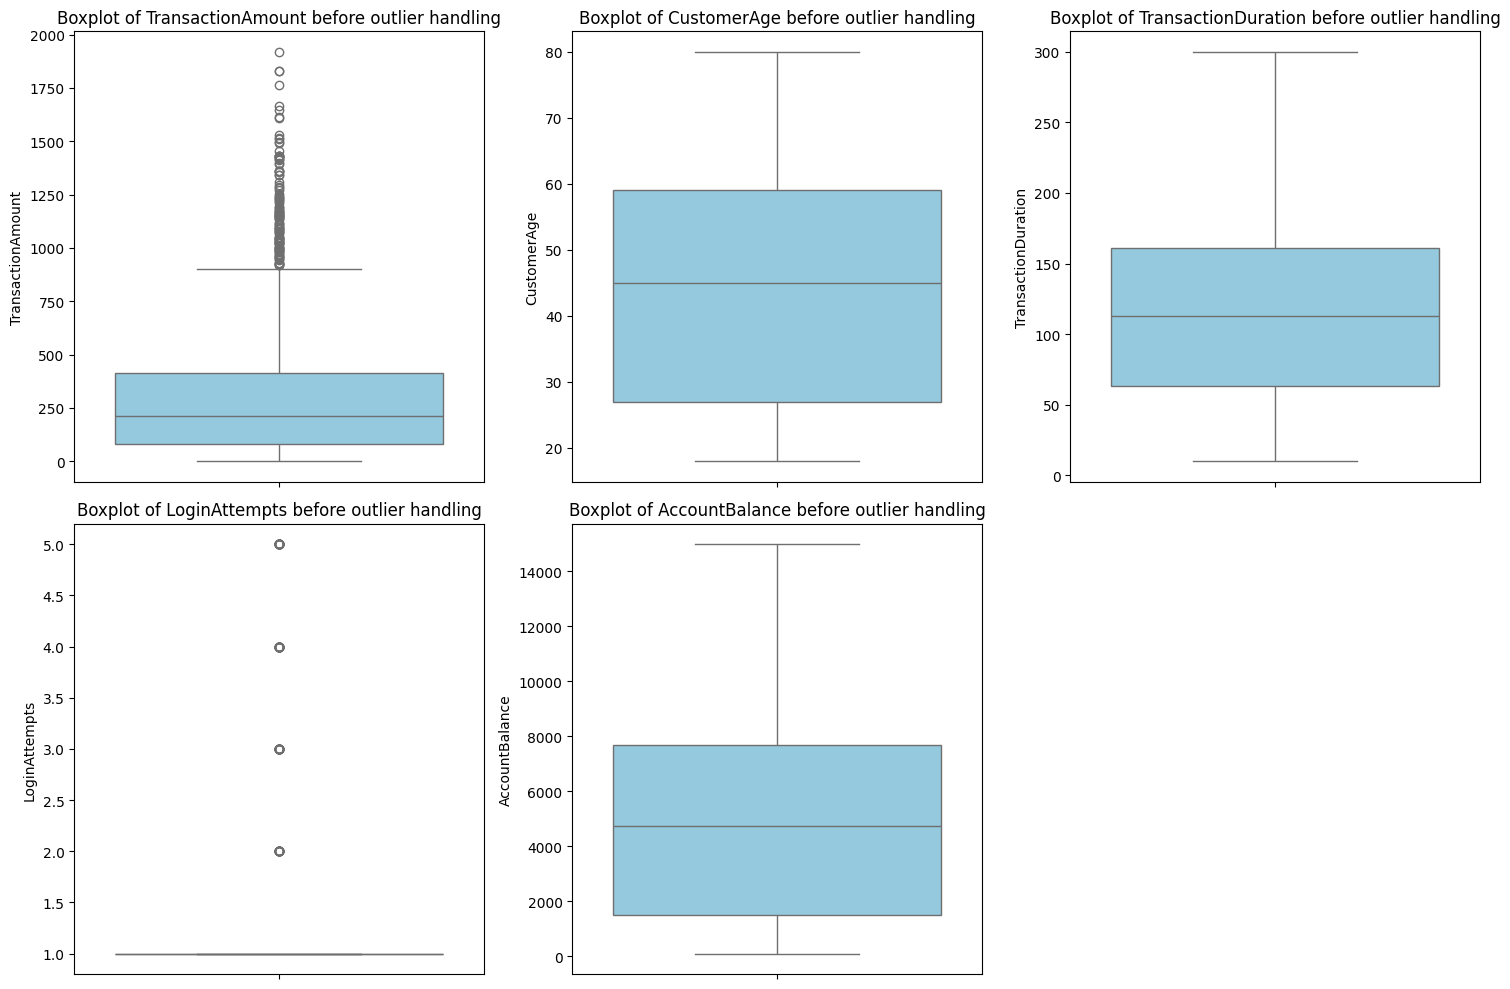

In [14]:
fig, axes = plt.subplots (nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, var in enumerate(numerical_cols):
  sns.boxplot(y=df[var], ax=axes[i], color='skyblue')
  axes[i].set_title(f'Boxplot of {var} before outlier handling')

fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()

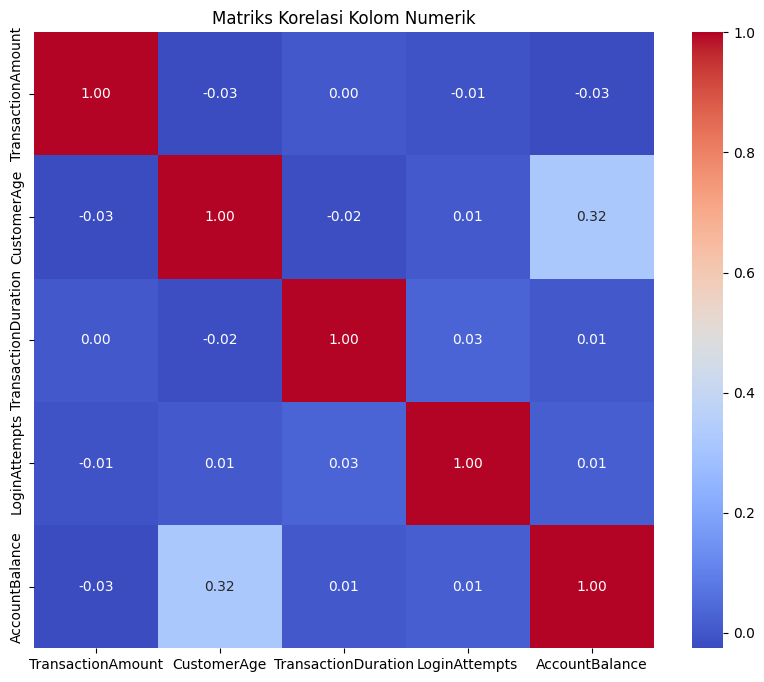

In [15]:
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi Kolom Numerik')
plt.show()

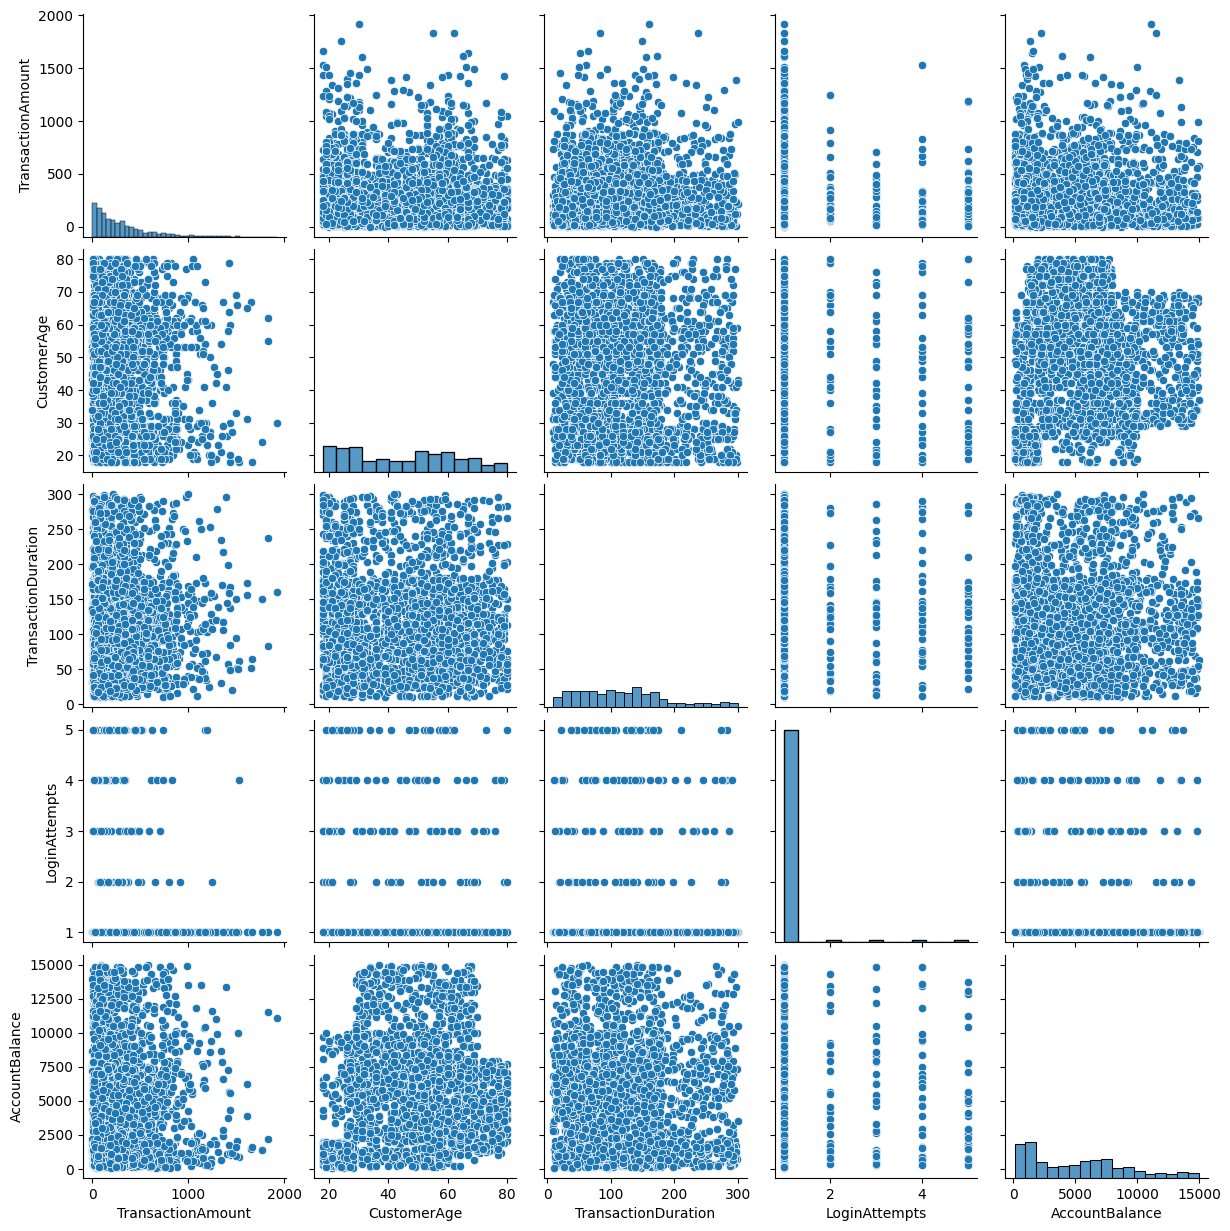

In [16]:
sns.pairplot(df[numerical_cols])
plt.show()

# 4. Visualisasi Data

In [17]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print("\nKolom Kategorikal:", categorical_cols)


Kolom Kategorikal: ['TransactionDate', 'TransactionType', 'Location', 'Channel', 'CustomerOccupation']


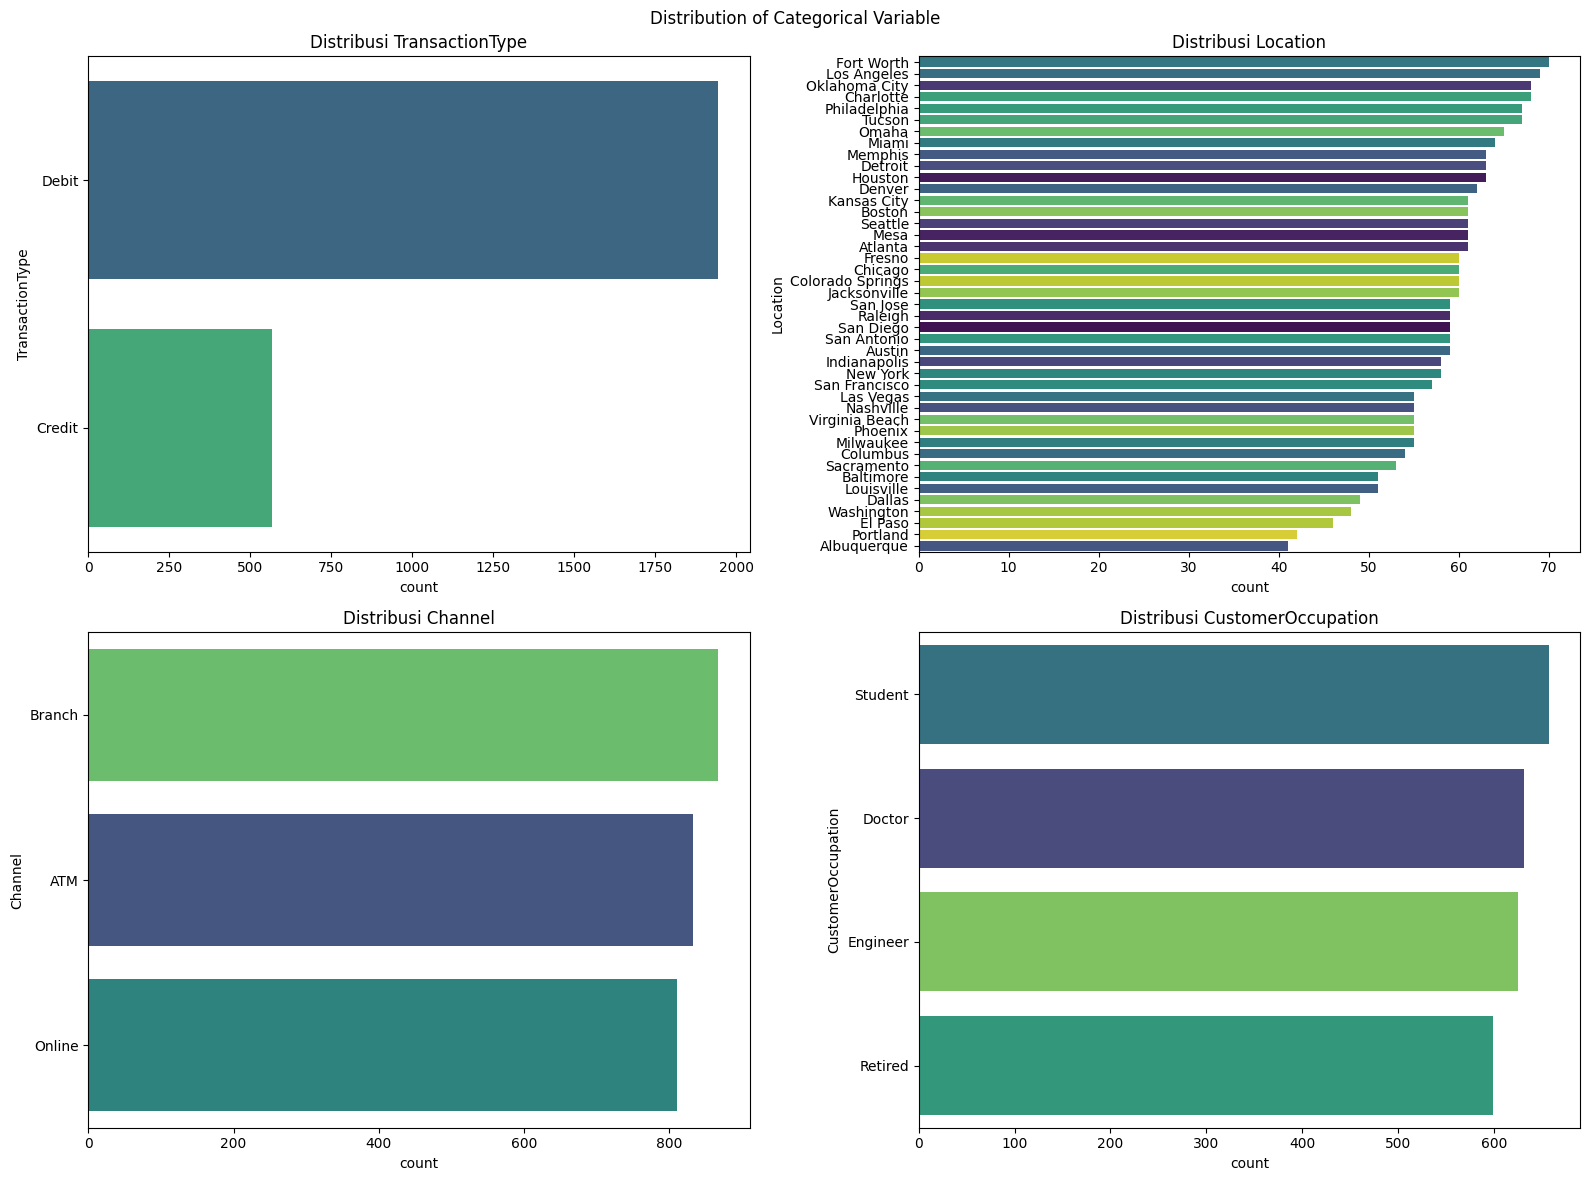

In [22]:
categorical_stats = ["TransactionType", "Location", "Channel", "CustomerOccupation"]

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Distribution of Categorical Variable")

for i, col in enumerate(categorical_stats):
    row, col_idx = divmod(i, 2)
    sns.countplot(y=df[col], order=df[col].value_counts().index, ax=axes[row, col_idx], hue=df[col], palette="viridis", legend=False)
    axes[row, col_idx].set_title(f"Distribusi {col}")

plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

# 1. Menghapus atau Menangani Data Kosong (Missing Values)

In [24]:
print("\nJumlah Data yang Hilang:")
print(df.isnull().sum())


Jumlah Data yang Hilang:
TransactionAmount      0
TransactionDate        0
TransactionType        0
Location               0
Channel                0
CustomerAge            0
CustomerOccupation     0
TransactionDuration    0
LoginAttempts          0
AccountBalance         0
dtype: int64


# 2. Menghapus Data Duplikat

In [26]:
print("\nJumlah Data Duplikat sebelum penghapusan:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("\nJumlah Data Duplikat setelah penghapusan:", df.duplicated().sum())


Jumlah Data Duplikat sebelum penghapusan: 0

Jumlah Data Duplikat setelah penghapusan: 0


# 3. Deteksi dan Penanganan Outlier

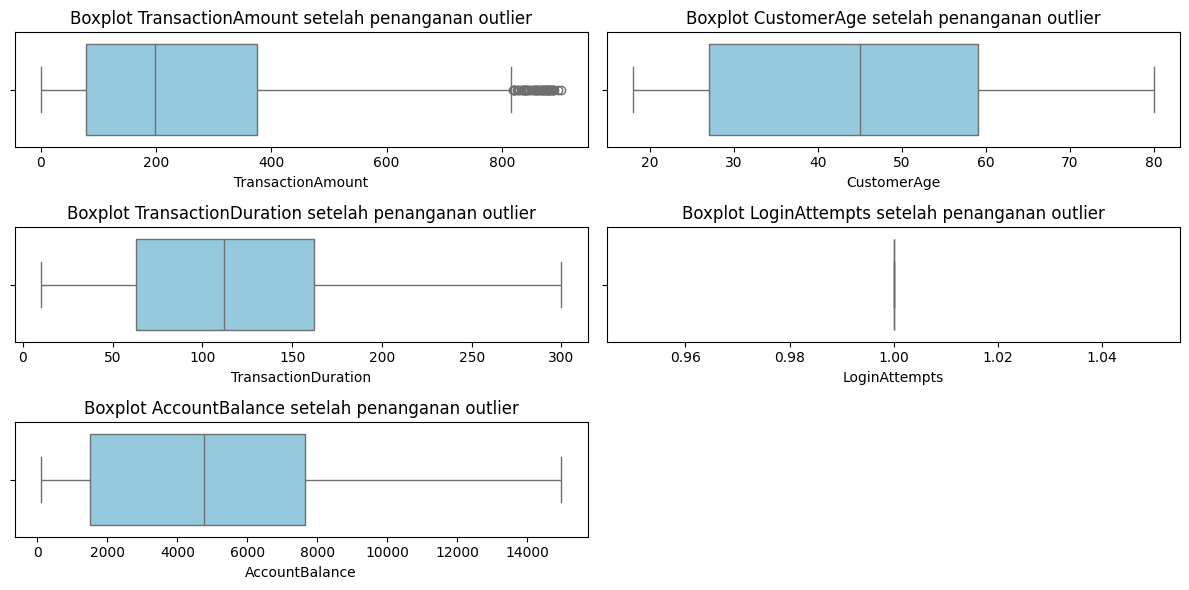

In [27]:
def remove_outliers(df, numerical_cols):
  df_iqr = df.copy()

  plt.figure(figsize=(12, 6))

  for i, col in enumerate(numerical_cols, 1):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_iqr = df_iqr[(df_iqr[col] >= lower_bound) & (df_iqr[col] <= upper_bound)]

    plt.subplot(len(numerical_cols) // 2 + 1, 2, i)
    sns.boxplot(x=df_iqr[col], color='skyblue')
    plt.title(f'Boxplot {col} setelah penanganan outlier')
    plt.xlabel(col)

  plt.tight_layout()
  plt.show()

  return df_iqr

df_iqr = remove_outliers(df, numerical_cols)


# 4. Encoding Data Kategorikal

In [31]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']

label_encoder = {col : LabelEncoder() for col in categorical_cols}
print("Data Sebelum Encoding")
print(df_iqr[categorical_cols].head(), "\n")

for col in categorical_cols:
  df_iqr[col + '_encoded'] = label_encoder[col].fit_transform(df_iqr[col])

print("Data Setelah Encoding")
columns_encoded = [col + '_encoded' for col in categorical_cols]
print(df_iqr[categorical_cols + columns_encoded].head())

Data Sebelum Encoding
  TransactionType   Location Channel CustomerOccupation
0           Debit  San Diego     ATM             Doctor
1           Debit    Houston     ATM             Doctor
2           Debit       Mesa  Online            Student
3           Debit    Raleigh  Online            Student
4          Credit    Atlanta  Online            Student 

Data Setelah Encoding
  TransactionType   Location Channel CustomerOccupation  \
0           Debit  San Diego     ATM             Doctor   
1           Debit    Houston     ATM             Doctor   
2           Debit       Mesa  Online            Student   
3           Debit    Raleigh  Online            Student   
4          Credit    Atlanta  Online            Student   

   TransactionType_encoded  Location_encoded  Channel_encoded  \
0                        1                36                0   
1                        1                15                0   
2                        1                23                2   
3  

# 5. Normalisasi atau Standarisasi Fitur

In [33]:
from sklearn.preprocessing import StandardScaler

df_scaled = df_iqr.copy()

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

df_scaled.head()

TransactionAmount      TransactionDate TransactionType   Location Channel  \
0              14.09  2023-04-11 16:29:14           Debit  San Diego     ATM   
1             376.24  2023-06-27 16:44:19           Debit    Houston     ATM   
2             126.29  2023-07-10 18:16:08           Debit       Mesa  Online   
3             184.50  2023-05-05 16:32:11           Debit    Raleigh  Online   
4              13.45  2023-10-16 17:51:24          Credit    Atlanta  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70             Doctor                   81              1   
1           68             Doctor                  141              1   
2           19            Student                   56              1   
3           26            Student                   25              1   
4           26            Student                  198              1   

   AccountBalance  TransactionType_encoded  Location_encoded  Channel_encoded  \
0         5112.21                        1                36                0   
1        13758.91                        1                15                0   
2         1122.35                        1                23                2   
3         8569.06                        1                33                2   
4         7429.40                        0                 1                2   

   CustomerOccupation_encoded  
0                           0  
1                           0  
2                           3  
3                           3  
4                           3

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [34]:
X = df_scaled[numerical_cols]

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X)
df_scaled['cluster_kmeans'] = kmeans.labels_

silhouette_scores = silhouette_score(X, kmeans.labels_)
print(f'Silhouette Score Before Feature Selection : {silhouette_scores:.4f}')

X_selected = X

kmeans_selection = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_selection.fit(X_selected)

silhouette_scores_selection = silhouette_score(X_selected, kmeans_selection.labels_)
print(f'Silhouette Score After Feature Selection : {silhouette_scores_selection:.4f}')

Silhouette Score Before Feature Selection : 0.6285
Silhouette Score After Feature Selection : 0.6285


In [35]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

kmeans_pca = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_pca.fit(X_pca)
df_scaled['cluster_kmeans_pca'] = kmeans_pca.labels_

silhouette_score_pca = silhouette_score(X_pca, kmeans_pca.labels_)
print(f'Silhouette Score After PCA : {silhouette_score_pca:.4f}')

Silhouette Score After PCA : 0.6299


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

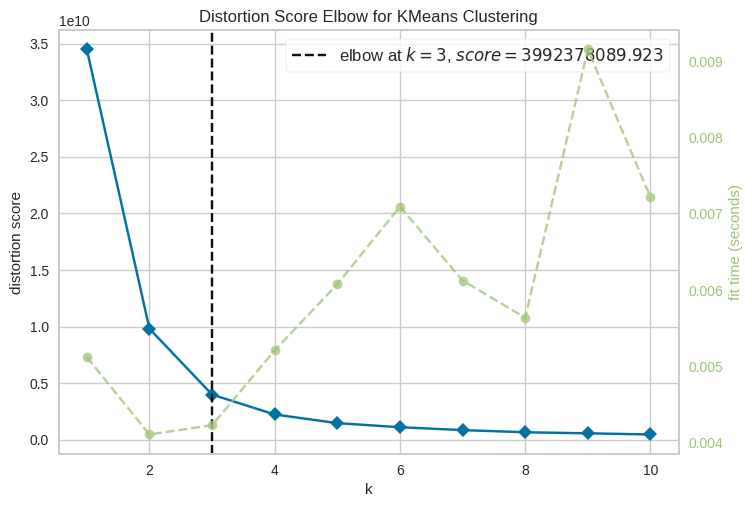

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [44]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1, 11))
visualizer.fit(X)
visualizer.ax.set_title('Distortion Score Elbow for KMeans Clustering', fontsize=14)
visualizer.show()

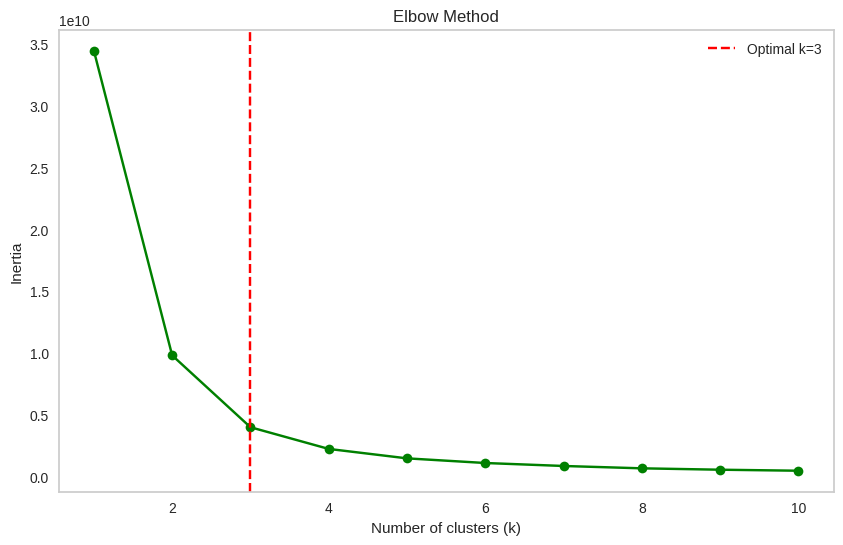

In [54]:
import matplotlib.pyplot as plt

inertia = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
  kmeans.fit(X)
  inertia.append(kmeans.inertia_)

plt.clf()
plt.cla()
plt.close()

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(range(1, 11), inertia, marker='o', color='green')
ax.set_title('Elbow Method')
ax.set_xlabel('Number of clusters (k)')
ax.set_ylabel('Inertia')
ax.axvline(x=3, color='red', linestyle='--', label='Optimal k=3')
ax.legend()
ax.grid()
plt.show()

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [55]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

feature = X
selector = SelectKBest(score_func=mutual_info_classif, k=2)
X_selected = selector.fit_transform(feature, kmeans.labels_)

print("\nHasil Feature Selection")
print("\nFeature Before Selection:", feature.shape[1])
print("\nFeature After Selection:", X_selected.shape[1])

feature_selected = feature.columns[selector.get_support()]
print("\nFeature Selected After Feature Selection:", feature_selected)

print("\nKMeans Clustering After Feature Selectionn")
kmeans_selection = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_selection.fit(X_selected)

df_scaled['cluster_kmeans_selection'] = kmeans_selection.labels_

silhouette_scores_selection = silhouette_score(X_selected, kmeans_selection.labels_)
print(f'Silhouette Score After Feature Selection : {silhouette_scores_selection:.4f}')


Hasil Feature Selection

Feature Before Selection: 5

Feature After Selection: 2

Feature Selected After Feature Selection: Index(['CustomerAge', 'AccountBalance'], dtype='object')

KMeans Clustering After Feature Selectionn


KMeans(n_clusters=3, n_init=10, random_state=42)

In [58]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_selected_labels = kmeans.fit_predict(X_selected)

silhouette_scores_selected = silhouette_score(X_selected, kmeans_selected_labels)

clustering_score = pd.DataFrame({
    'Model' : ['K-Means Fitur Terpilih'],
    'Silhouette Score Before Fitur Terpilih' : [silhouette_scores_selection],
    'Silhouette Score' : [silhouette_scores_selected],
})
clustering_score

Model  Silhouette Score Before Fitur Terpilih  \
0  K-Means Fitur Terpilih                                0.628477   

   Silhouette Score  
0          0.640674

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

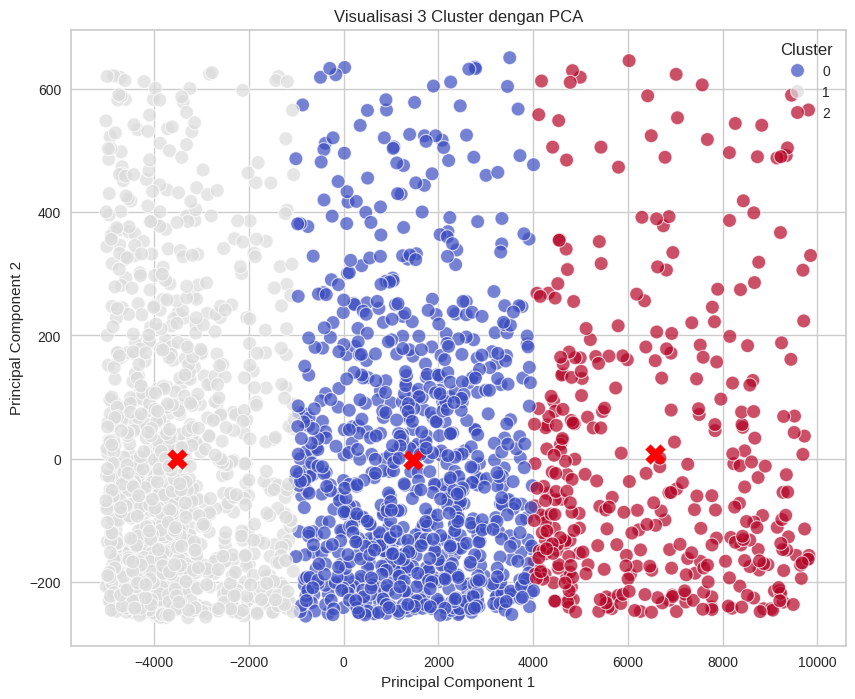

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

plt.clf()
plt.cla()
plt.close()

optimal_k = 3
kmeans_akhir = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans_akhir.fit_predict(X_pca)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

df_scaled['cluster_kmeans_optimal'] = clusters

fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='coolwarm', s=100, alpha=0.7, ax=ax)

ax.set_title('Visualisasi 3 Cluster dengan PCA')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
plt.legend(title='Cluster', loc='upper right')

centroid = kmeans_akhir.cluster_centers_
plt.scatter(centroid[:, 0], centroid[:, 1], marker="X", s=200, c="red", label="Centroid")
plt.show()

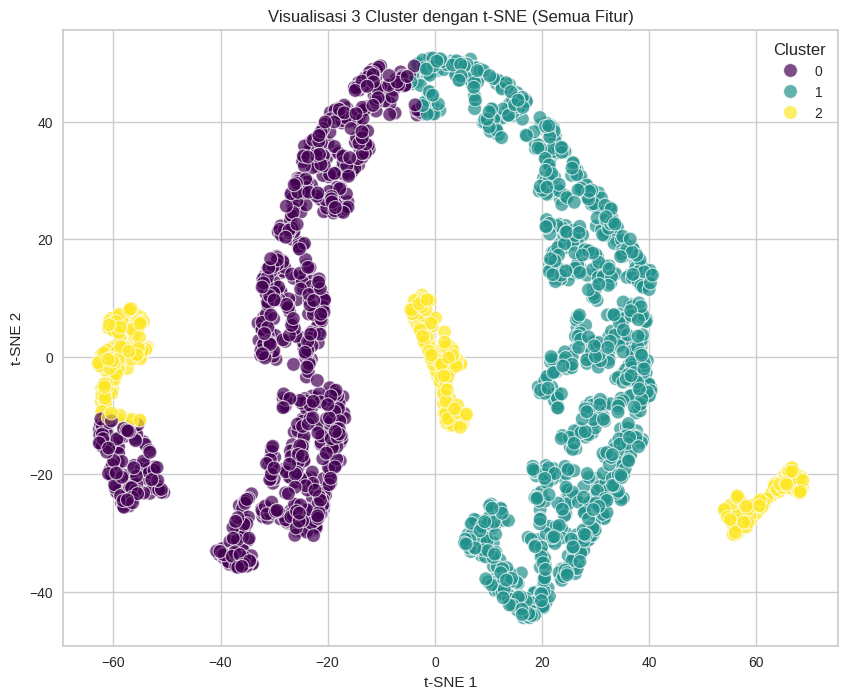

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

tsne = TSNE(n_components=2, random_state=42, init='random')
X_tsne = tsne.fit_transform(X)

fig, ax = plt.subplots(figsize=(10, 8))

sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=kmeans.labels_, palette='viridis', s=100, alpha=0.7, ax=ax)
ax.set_title("Visualisasi 3 Cluster dengan t-SNE (Semua Fitur)")
ax.set_xlabel("t-SNE 1")
ax.set_ylabel("t-SNE 2")
ax.legend(title="Cluster")

plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [ ]:
# Type your code here


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [93]:
from sklearn.preprocessing import LabelEncoder

label_encoder = {}

for col in categorical_cols:
  le = LabelEncoder()
  df_scaled [col + '_Encoded'] = le.fit_transform(df_scaled[col])
  label_encoder[col] = le

for col in categorical_cols:
  df_scaled[col + '_Inverse'] = label_encoder[col].inverse_transform(df_scaled[col + '_Encoded'])

df_scaled.head()

TransactionAmount      TransactionDate TransactionType   Location Channel  \
0              14.09  2023-04-11 16:29:14           Debit  San Diego     ATM   
1             376.24  2023-06-27 16:44:19           Debit    Houston     ATM   
2             126.29  2023-07-10 18:16:08           Debit       Mesa  Online   
3             184.50  2023-05-05 16:32:11           Debit    Raleigh  Online   
4              13.45  2023-10-16 17:51:24          Credit    Atlanta  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70             Doctor                   81              1   
1           68             Doctor                  141              1   
2           19            Student                   56              1   
3           26            Student                   25              1   
4           26            Student                  198              1   

   AccountBalance  ...  cluster_kmeans_pca  cluster_kmeans_optimal  \
0         5112.21  ...                   0                       0   
1        13758.91  ...                   2                       2   
2         1122.35  ...                   1                       1   
3         8569.06  ...                   0                       0   
4         7429.40  ...                   0                       0   

   TransactionType_Encoded  Location_Encoded  Channel_Encoded  \
0                        1                36                0   
1                        1                15                0   
2                        1                23                2   
3                        1                33                2   
4                        0                 1                2   

   CustomerOccupation_Encoded  TransactionType_Inverse  Location_Inverse  \
0                           0                    Debit         San Diego   
1                           0                    Debit           Houston   
2                           3                    Debit              Mesa   
3                           3                    Debit           Raleigh   
4                           3                   Credit           Atlanta   

   Channel_Inverse  CustomerOccupation_Inverse  
0              ATM                      Doctor  
1              ATM                      Doctor  
2           Online                     Student  
3           Online                     Student  
4           Online                     Student  

[5 rows x 25 columns]

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

        TransactionAmount                                                  \
                    count        mean         std   min      25%      50%   
Cluster                                                                     
0                   875.0  252.430137  211.886450  0.32  78.8450  202.490   
1                  1041.0  257.450528  219.475869  0.26  76.1600  199.020   
2                   366.0  257.450929  227.242044  1.14  79.4375  182.435   

                         CustomerAge             ... Channel_Encoded       \
             75%     max       count       mean  ...             75%  max   
Cluster                                          ...                        
0        371.580  903.19       875.0  51.565714  ...             2.0  2.0   
1        374.610  883.92      1041.0  37.864553  ...             2.0  2.0   
2        387.145  896.79       366.0  47.620219  ...             2.0  2.0   

        CustomerOccupation_Encoded                                        

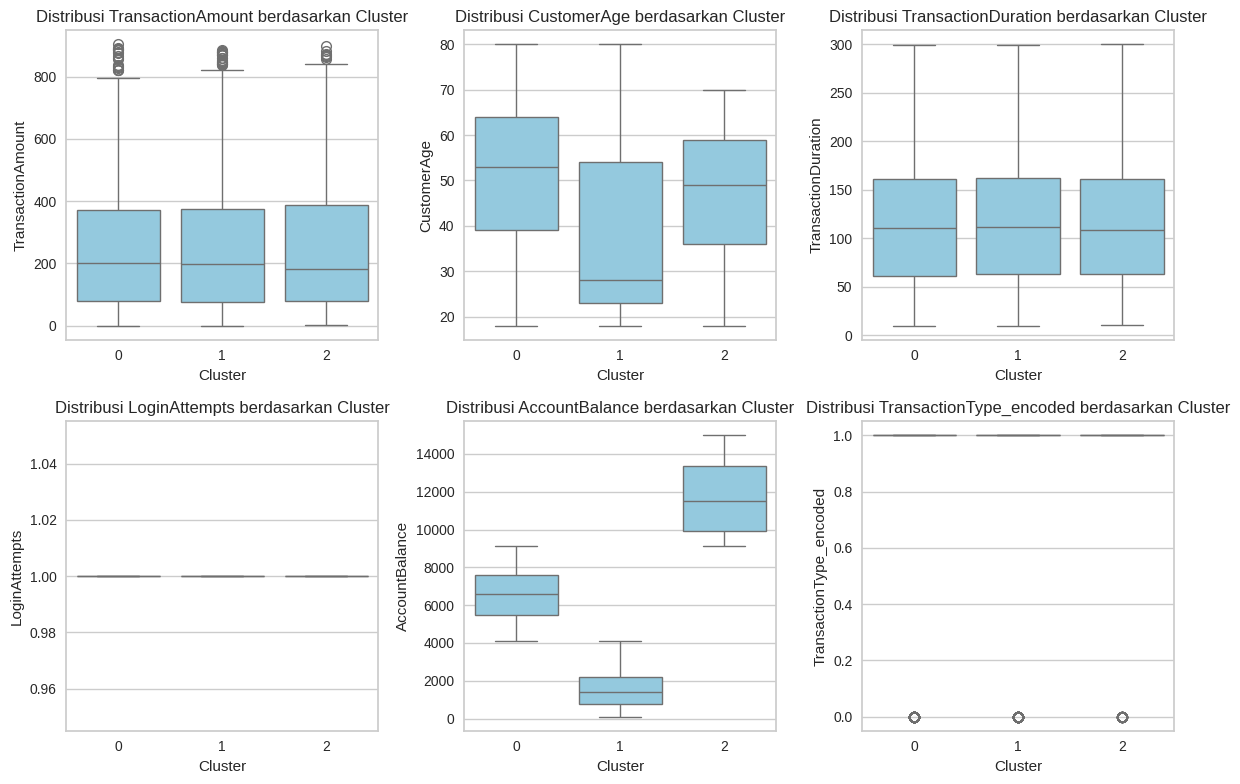

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_scaled['Cluster'] = kmeans.labels_

sum_cluster = df_scaled.groupby('Cluster').describe()
print(sum_cluster)

numerical_feature = df_scaled.select_dtypes(include=np.number).columns.tolist()
numerical_feature.remove('Cluster')

plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_feature[:6]):
  ax = plt.subplot(2, 3, i + 1)
  sns.boxplot(x=df_scaled['Cluster'], y=df_scaled[feature], color='skyblue', ax=ax)
  plt.title(f'Distribusi {feature} berdasarkan Cluster')


  ax.set_xlabel('Cluster')
  ax.set_ylabel(feature)

plt.tight_layout()
plt.show()

In [104]:
print(df_scaled['Cluster'].value_counts())

Cluster
1    1041
0     875
2     366
Name: count, dtype: int64


               TransactionAmount                                       \
                           count        mean         std   min    25%   
cluster_kmeans                                                          
0                          873.0  252.128958  211.389091  0.32  78.92   
1                         1041.0  257.450528  219.475869  0.26  76.16   
2                          368.0  258.138125  228.242532  1.14  79.23   

                                         CustomerAge             ...  \
                    50%      75%     max       count       mean  ...   
cluster_kmeans                                                   ...   
0               202.490  369.890  903.19       873.0  51.560137  ...   
1               199.020  374.610  883.92      1041.0  37.864553  ...   
2               182.435  388.565  896.79       368.0  47.654891  ...   

               CustomerOccupation_Encoded      Cluster                     \
                                      75%  max   co

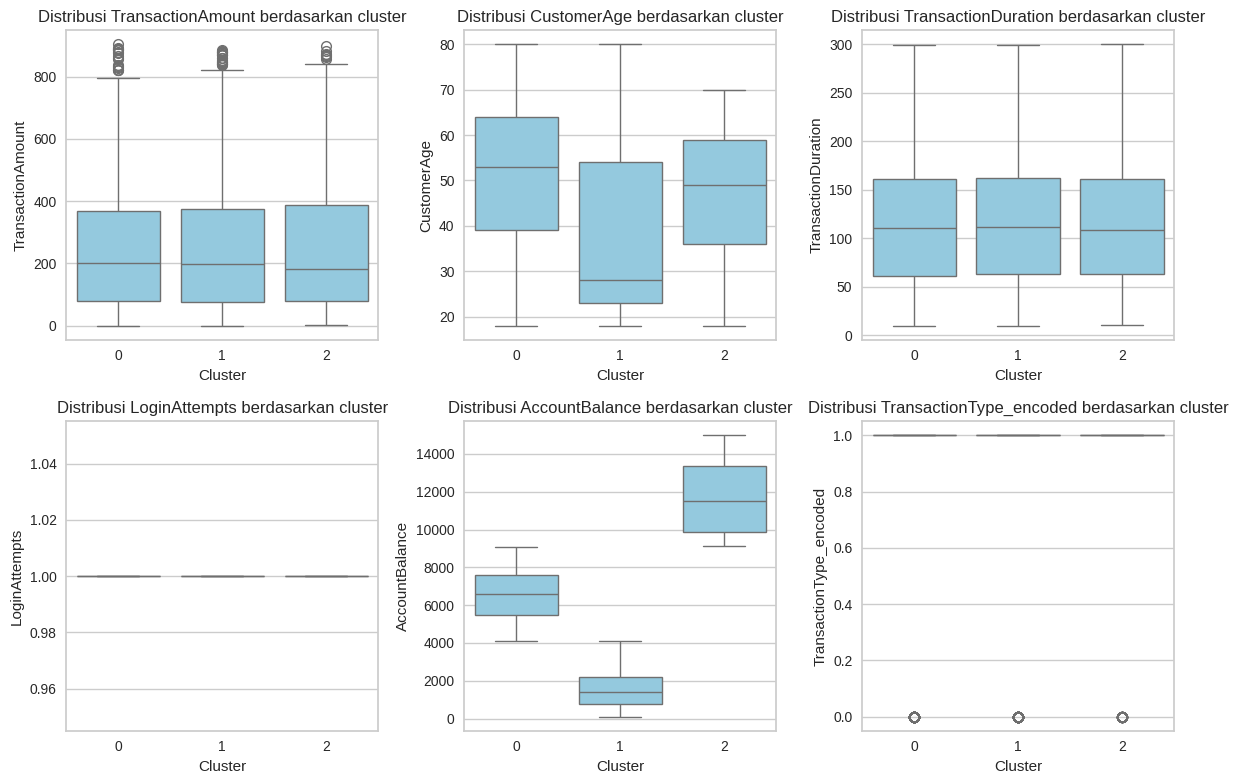

In [107]:
cluster_sum = df_scaled.groupby('cluster_kmeans').describe()
print(cluster_sum)

numerical_feature = df_scaled.select_dtypes(include=np.number).columns.tolist()
numerical_feature.remove('cluster_kmeans')

plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_feature[: 6]):
  ax = plt.subplot(2, 3, i + 1)
  sns.boxplot(x=df_scaled['cluster_kmeans'], y=df_scaled[feature], color='skyblue', ax=ax)
  ax.set_title(f'Distribusi {feature} berdasarkan cluster')
  ax.set_xlabel('Cluster')
  ax.set_ylabel(feature)

plt.tight_layout()
plt.show()

In [109]:
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print(cluster_sum)


               TransactionAmount                                       \
                           count        mean         std   min    25%   
cluster_kmeans                                                          
0                          873.0  252.128958  211.389091  0.32  78.92   
1                         1041.0  257.450528  219.475869  0.26  76.16   
2                          368.0  258.138125  228.242532  1.14  79.23   

                                         CustomerAge                        \
                    50%      75%     max       count       mean        std   
cluster_kmeans                                                               
0               202.490  369.890  903.19       873.0  51.560137  15.716128   
1               199.020  374.610  883.92      1041.0  37.864553  18.218015   
2               182.435  388.565  896.79       368.0  47.654891  13.007142   

                                             TransactionDuration              \
            

Tulis hasil interpretasinya di sini.
1. Cluster 0 :

*   Rata-rata TransactionAmount   : $252.12

*   Rata-rata CustomerAge         : 51 tahun
*   Rata-rata AccountBalance      : $6571.64
*   Rata-rata TransactionDuration : 117.41 detik
*   Rata-rata LoginAttempts       : 1 kali  
*   Analisis : Nilai transaksi termasuk kategori menengah, lebih besar dari transaksi rata-rata nasabah biasa. Ada kemungkinan digunakan untuk pembayaran rutin bulanan seperti tagihan besar, pembeliat alat elektronik atau bahkan pembayaran cicilan. Mayoritas nasabah berada di usia paruh baya. Lebih cenderung melakukan transaksi konservatif seperti investasi, asuransi dan tabungan selain itu kurang aktif dalam transaksi digital karena pada cluster ini sudah bukan generasi muda. Dan saldo relatif tinggi, menunjukkan nasabah dengan stabilitas keuangan yang baik. Terdapat potensi pada cluster ini untuk produk deposito atau investasi rendah yang tidak terlalu bergantung pada transaksi kecil pada harian. Waktu transaksi lebih lama dibanding transaksi biasa. Pada cluster ini nasabah sangat jarang login, berbeda dengan nasabah digital yang biasanya login berkali-kali dalam sehari. Nasabah lebih banyak menggunakan layanan seperti kantor cabang atau menghubungi CS melalui telepon.

2. Cluster 1 :

*   Rata-rata TransactionAmount   : $ 257.45

*   Rata-rata CustomerAge         : 37 tahun
*   Rata-rata AccountBalance      : $1592.65
*   Rata-rata TransactionDuration : 120.52
*   Rata-rata LoginAttempts       : 1 kali
*   Analisis : Nilai transaksi menengah, tidak terlalu besar maupun kecil. Ada kemungkinan untuk transaksi rutin bulanan seperti pembayaran tagihan dan juga belanja kebutuhan pokok dan ini bukan transaksi impulsif atau pembelian yang cukup besar. Rata-rata usia yaitu usia produktif muda yang sudah memiliki stabilitas finansial tetapi belum masuk ke fase konservatif. Saldo cukup tetapi tidak besar. Berpotensi untuk produk tabungan berjangka pendek. Serta waktu transaksi yang cukup lama, yang kemungkinan melakukan transaksi kompleks atau multi-payment hal ini disebabkan kurang familiar dengan teknologi digital banking. Dan juga minim akses digital karena lebih nyaman dengan transaksi offline.

3. Cluster 2 :

*   Rata-rata TransactionAmount   : $258.13

*   Rata-rata CustomerAge         : 47 tahun
*   Rata-rata AccountBalance      : $11651.66
*   Rata-rata TransactionDuration : 368.0 detik
*   LoginAttempts                 : 1 kali
*   Analisis                      : Nilai transaksi tinggi, dapat dilihat pengeluaran yang terencana dan konsisten. Bukan impulsif ada kemungkinan untuk pembayaran sekolah atau kuliah, premi asuransi tahunan dan investasi rutin. Rata-rata usiah setengah baya yang memiliki puncak karir dengan penghasilan stabil dan konservatif yang kebutuhan finansialnya digunakan untuk perencanaan pensiun, pendidikan anak dan perlindungan aset. Cluster ini termasuk nasabah prioritas serta berpotensi besar untuk produk deposito atau obligasi. Waktu transaksi sangat lama yang kemungkinan terjadi transaksi kompleks seperti pembelian propert dan investasi serta terkadang kesulitan dalam teknologi. Minim interkasi digital, lebih memilih layanan telpon banking atau transaksi secara langsung ke cabang.






# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [110]:
df_scaled['Cluster'] = kmeans.labels_
df_scaled.to_csv('clustering_bank_transaction.csv', index=False)

In [111]:
pd.read_csv('/content/clustering_bank_transaction.csv')

TransactionAmount      TransactionDate TransactionType  \
0                 14.09  2023-04-11 16:29:14           Debit   
1                376.24  2023-06-27 16:44:19           Debit   
2                126.29  2023-07-10 18:16:08           Debit   
3                184.50  2023-05-05 16:32:11           Debit   
4                 13.45  2023-10-16 17:51:24          Credit   
5                 92.15  2023-04-03 17:15:01           Debit   
6                  7.08  2023-02-15 16:36:48          Credit   
7                171.42  2023-05-08 17:47:59          Credit   
8                106.23  2023-03-21 16:59:46          Credit   
9                815.96  2023-03-31 16:06:57           Debit   
10                17.78  2023-03-14 16:46:10          Credit   
11               190.02  2023-02-06 17:30:00           Debit   
12               494.52  2023-06-07 17:21:28          Credit   
13               781.76  2023-11-20 16:39:15           Debit   
14               166.99  2023-02-13 16:53:57           Debit   
15               465.45  2023-12-12 16:23:31           Debit   
16               555.80  2023-10-30 16:52:49          Credit   
17               492.93  2023-12-14 18:32:14           Debit   
18                18.68  2023-02-21 16:56:50          Credit   
19                71.48  2023-06-08 18:18:50          Credit   
20                59.32  2023-02-28 16:36:58           Debit   
21                85.77  2023-08-11 18:31:31           Debit   
22                52.20  2023-06-06 18:54:15           Debit   
23               145.54  2023-03-02 16:43:56           Debit   
24                 7.49  2023-10-20 17:53:13          Credit   
25                40.32  2023-03-29 16:42:38           Debit   
26               127.45  2023-01-24 16:18:32           Debit   
27                56.17  2023-09-20 16:55:42           Debit   
28                28.31  2023-07-17 17:49:22          Credit   
29                59.12  2023-02-06 16:24:24           Debit   
30               877.81  2023-03-13 17:23:24           Debit   
31               255.26  2023-10-27 16:42:49          Credit   
32               124.76  2023-10-16 16:32:56           Debit   
33                78.13  2023-11-21 16:58:44           Debit   
34               649.28  2023-03-02 17:53:32           Debit   
35               335.63  2023-01-24 17:17:20           Debit   
36               328.47  2023-07-31 18:39:50           Debit   
37                34.02  2023-01-09 16:13:21           Debit   
38               241.42  2023-04-20 18:57:43          Credit   
39                55.32  2023-04-12 16:03:37           Debit   
40               304.31  2023-07-26 16:52:28           Debit   
41               435.27  2023-10-04 17:49:29           Debit   
42               164.49  2023-12-13 16:01:38           Debit   
43               510.24  2023-10-09 16:29:40           Debit   
44               626.90  2023-11-27 16:45:57           Debit   
45                22.01  2023-03-27 16:45:18          Credit   
46               425.34  2023-02-13 16:59:39          Credit   
47               424.56  2023-02-21 17:45:55           Debit   
48                85.43  2023-06-07 16:45:34           Debit   
49               169.50  2023-09-07 16:51:27           Debit   
50               104.63  2023-03-29 17:47:16           Debit   
51               316.95  2023-08-04 17:53:40           Debit   
52                60.54  2023-12-14 17:52:37          Credit   
53               292.56  2023-03-03 17:37:41          Credit   
54               386.52  2023-06-09 16:18:15           Debit   
55               112.07  2023-10-02 16:35:22           Debit   
56               568.52  2023-10-06 18:44:37           Debit   
57               349.64  2023-11-07 16:48:23           Debit   
58               601.40  2023-05-30 17:43:25          Credit   
59                 5.77  2023-11-02 16:01:40           Debit   
60               201.33  2023-03-29 17:00:31          Credit   
61               298.42  2023-04-25 16